In [14]:
import numpy as np
import sdeint
import matplotlib.pyplot as plt




In [15]:
mean = lambda m,r,t,x0 : m*(1-np.exp(-r*t)) + np.exp(-r*t)*x0
var = lambda r,s,t,v_x0: (s**2 / (2*r))*(1-np.exp(-2*r*t))+np.exp(-r*t)*v_x0

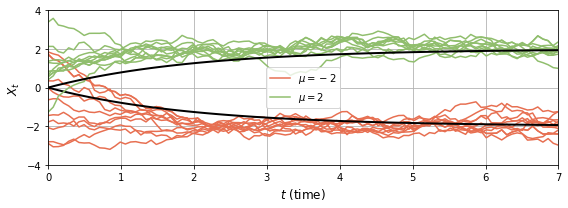

In [16]:
a = -2
b = .5
m = 1
tspan = np.linspace(0.0, 7.0, 100)
x0 = 0

def f(x, t):
    return m*(a - x)

def g(x, t):
    return b
mean = lambda m,r,t,x0 : a*(1-np.exp(-r*t)) + np.exp(-r*t)*x0


fig,ax=plt.subplots(figsize=(8,3))
ax.grid()
for i in range(10):
    x0=np.random.normal(0,2)
    result = sdeint.itoint(f, g, x0, tspan)
    ax.plot(tspan,result,alpha=1,c="#e76f51")
ax.plot(tspan,result,alpha=1,c="#e76f51",label="$\mu=-2$")  
ax.plot(tspan,mean(m,b,tspan,0),c="k",lw=2)    

a=2
for i in range(10):
    x0=np.random.normal(0,2)
    result = sdeint.itoint(f, g, x0, tspan)
    ax.plot(tspan,result,alpha=1,c="#90be6d")
ax.plot(tspan,result,alpha=1,c="#90be6d",label="$\mu=2$")  
ax.set_ylabel("$X_t$",fontsize=12)
ax.set_xlabel("$t$ (time)",fontsize=12)
ax.set_ylim(-4,4)
ax.set_xlim(0,7)
ax.legend()

# var= lambda s,g,t: s**2/(2*m) * (1-np.exp(-2*m*t))

ax.plot(tspan,mean(m,b,tspan,0),c="k",lw=2)
plt.tight_layout()
plt.savefig("paper/figs/paths.png",dpi=300)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc
def h(mu1,mu2,s1,s2):
    a=np.sqrt(2*s1*s2/(s1**2 + s2**2))
    b=-0.25*(mu1-mu2)**2 / (s1**2 + s2**2)
    return (a*np.exp(b))

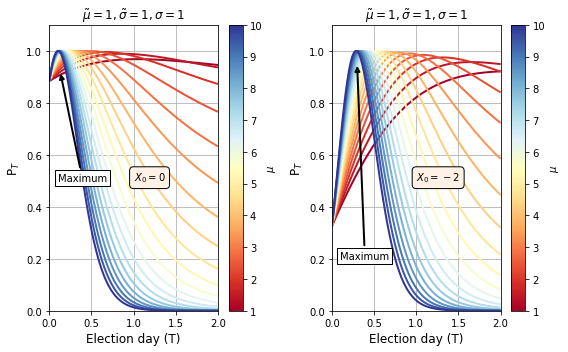

In [333]:
mean = lambda u,r,t,x0 : u*(1-np.exp(-r*t)) + np.exp(-r*t)*x0
t=np.linspace(0,2,100)
n=20


U=np.linspace(1,10,n)
p=[]
x=[]
for u in U:
    mu1=mean(u,1,t,0)
    s1=var(r=1,s=1,t=t,v_x0=1)
    p.append(h(mu1,mu2=1,s1=s1,s2=1))
    x.append(t)
fig, ax1 = plt.subplots(1,2,figsize=(8,5))
ax=ax1[0]
lc = multiline(x, p, U, cmap='RdYlBu', lw=2,ax=ax)

axcb = fig.colorbar(lc,label="$\mu$",ax=ax)
ax.set_title("$\\tilde{\mu}=1,\\tilde{\sigma}=1,\sigma=1$")
ax.set_ylim(0,1.1)
ax.set_xlim(0,2)
ax.grid()
ax.set_ylabel("P$_T$",fontsize=12)
ax.set_xlabel("Election day (T)",fontsize=12)
ax.annotate("Maximum",xy=[.13,.92],xytext=[.1,.5],textcoords='data', arrowprops=dict(arrowstyle='-|>',lw=2),
            bbox=dict(boxstyle='square', fc='w', ec='k'))
ax.annotate("$X_0=0$",xytext=[1,.5],xy=[1,.5],bbox=dict(fc='#fff1e6', ec='k',boxstyle='round,pad=.4'))
ax=ax1[1]
U=np.linspace(1,10,n)
p=[]
x=[]
for u in U:
    mu1=mean(u,1,t,-2)
    s1=var(r=1,s=1,t=t,v_x0=1)
    p.append(h(mu1,mu2=1,s1=s1,s2=1))
    x.append(t)
lc = multiline(x, p, U, cmap='RdYlBu', lw=2,ax=ax)

axcb = fig.colorbar(lc,label="$\mu$",ax=ax)
ax.set_title("$\\tilde{\mu}=1,\\tilde{\sigma}=1,\sigma=1$")
ax.set_ylim(0,1.1)
ax.set_xlim(0,2)
ax.grid()
ax.set_xlabel("Election day (T)",fontsize=12)
ax.set_ylabel("P$_T$",fontsize=12)
ax.annotate("Maximum",xy=[.3,.95],xytext=[.1,.2],textcoords='data', arrowprops=dict(arrowstyle='-|>',lw=2),
            bbox=dict(boxstyle='square', fc='w', ec='k'))
ax.annotate("$X_0=-2$",xytext=[1,.5],xy=[1,.5],bbox=dict(fc='#fff1e6', ec='k',boxstyle='round,pad=.4'))

plt.tight_layout()
plt.savefig("paper/figs/pt_mu.png",dpi=300)

In [18]:
mean = lambda m,r,t,x0 : m*(1-np.exp(-r*t)) + np.exp(-r*t)*x0
var = lambda r,s,t,v_x0: (s**2 / (2*r))*(1-np.exp(-2*r*t))+np.exp(-r*t)*v_x0

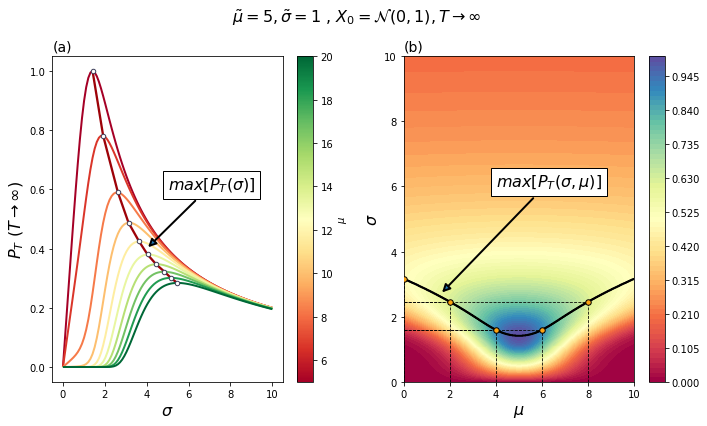

In [325]:
fig,ax1=plt.subplots(1,2,figsize=(10,6))

ax=ax1[0]
p=[]
max_1=[]
n=10
for i in np.linspace(5,20,n):
    t=100
    u_c=i
    v_c=1
    v_c=np.linspace(0,10,100)
    mu1=mean(m=u_c,r=1,t=t,x0=0)
    s1=var(r=1,s=v_c,t=t,v_x0=1)
    tmp=h(mu1,mu2=5,s1=s1,s2=1)
    p.append(tmp)
p=np.array(p)

lc = multiline([v_c]*p.shape[0], p, np.linspace(5,20,n), cmap='RdYlGn', lw=2,ax=ax)
axcb = fig.colorbar(lc,label="$\mu$",ax=ax)

maxes=np.array([[v_c[i],p[j][i]] for j,i in  enumerate(np.argmax(p,axis=1))])





ax.plot(maxes.T[0],maxes.T[1],c="#9d0208",zorder=-2,lw=2.3,ls="-")
ax.scatter(maxes.T[0],maxes.T[1],marker="o",s=20,edgecolors='#3d405b',facecolor="w",zorder=2)
ax.set_ylabel("$P_T$ $(T\\rightarrow \infty)$",fontsize=16)
ax.set_xlabel("$\sigma$",fontsize=16)
ax.annotate("$max[P_T(\\sigma)]$",xy=[4,.4],xytext=[5,.6],textcoords='data', arrowprops=dict(arrowstyle='-|>',lw=2,edgecolor="k"),
            bbox=dict(boxstyle='square', fc='w', ec='k'),fontsize=16)

ax.set_title("(a)", size=14, loc='left')



t=100
n=900
V=[]
U=np.linspace(0,10,n)
ps=[]
ax=ax1[1]
for u_c in U:
    v_c=np.linspace(0,10,n)
    mu1=mean(m=u_c,r=1,t=t,x0=0)
    s1=var(r=1,s=v_c,t=t,v_x0=1)
    p=h(mu1,mu2=5,s1=s1,s2=1)
    ps.append(p)
    V.append(v_c[np.argmax(p,axis=0)])
split=180
ax.plot(U,V,c="k",lw=2,zorder=1)
for i,j in zip(U[::split],V[::split]):
    ax.scatter(i,j,facecolor="#fca311",s=30,zorder=3,edgecolor="k")
    ax.plot([i,i],[0,j],c="k",lw=.8,zorder=2,ls="--")
    ax.plot([0,i],[j,j],c="k",lw=.8,zorder=2,ls="--")

ax.annotate("$max[P_T(\\sigma,\\mu)]$",xy=[1.6,2.7],xytext=[4,6],textcoords='data', arrowprops=dict(arrowstyle='-|>',lw=2,edgecolor="k"),
            bbox=dict(boxstyle='square', fc='w', ec='k'),fontsize=16)
c=ax.contourf(v_c,U,np.array(ps).T,90,cmap="Spectral")

ax.set_ylabel("$\sigma$",fontsize=16)
ax.set_xlabel("$\mu$",fontsize=16)

plt.suptitle('$\\tilde{\mu}=5,\\tilde{\sigma}=1$ , $X_0=\\mathcal{N}(0,1),T\\rightarrow\\infty$',fontsize=16)
plt.colorbar(c,ax=ax)
ax.set_title("(b)", size=14, loc='left')
plt.tight_layout()
plt.savefig("paper/figs/mu-sig.png",dpi=300)
plt.show()

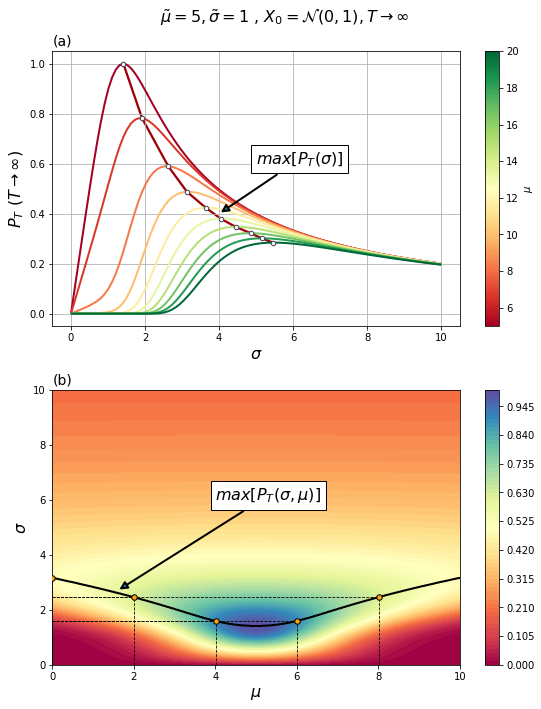

In [24]:
fig,ax1=plt.subplots(2,1,figsize=(8,10))

ax=ax1[0]
p=[]
max_1=[]
n=10
for i in np.linspace(5,20,n):
    t=100
    u_c=i
    v_c=1
    v_c=np.linspace(0,10,100)
    mu1=mean(m=u_c,r=1,t=t,x0=0)
    s1=var(r=1,s=v_c,t=t,v_x0=1)
    tmp=h(mu1,mu2=5,s1=s1,s2=1)
    p.append(tmp)
p=np.array(p)

lc = multiline([v_c]*p.shape[0], p, np.linspace(5,20,n), cmap='RdYlGn', lw=2,ax=ax)
axcb = fig.colorbar(lc,label="$\mu$",ax=ax)

maxes=np.array([[v_c[i],p[j][i]] for j,i in  enumerate(np.argmax(p,axis=1))])

ax.grid()



ax.plot(maxes.T[0],maxes.T[1],c="#9d0208",zorder=-2,lw=2.3,ls="-")
ax.scatter(maxes.T[0],maxes.T[1],marker="o",s=20,edgecolors='#3d405b',facecolor="w",zorder=2)
ax.set_ylabel("$P_T$ $(T\\rightarrow \infty)$",fontsize=16)
ax.set_xlabel("$\sigma$",fontsize=16)
ax.annotate("$max[P_T(\\sigma)]$",xy=[4,.4],xytext=[5,.6],textcoords='data', arrowprops=dict(arrowstyle='-|>',lw=2,edgecolor="k"),
            bbox=dict(boxstyle='square', fc='w', ec='k'),fontsize=16)

ax.set_title("(a)", size=14, loc='left')



t=100
n=900
V=[]
U=np.linspace(0,10,n)
ps=[]
ax=ax1[1]
for u_c in U:
    v_c=np.linspace(0,10,n)
    mu1=mean(m=u_c,r=1,t=t,x0=0)
    s1=var(r=1,s=v_c,t=t,v_x0=1)
    p=h(mu1,mu2=5,s1=s1,s2=1)
    ps.append(p)
    V.append(v_c[np.argmax(p,axis=0)])
split=180
ax.plot(U,V,c="k",lw=2,zorder=1)
for i,j in zip(U[::split],V[::split]):
    ax.scatter(i,j,facecolor="#fca311",s=30,zorder=3,edgecolor="k")
    ax.plot([i,i],[0,j],c="k",lw=.8,zorder=2,ls="--")
    ax.plot([0,i],[j,j],c="k",lw=.8,zorder=2,ls="--")

ax.annotate("$max[P_T(\\sigma,\\mu)]$",xy=[1.6,2.7],xytext=[4,6],textcoords='data', arrowprops=dict(arrowstyle='-|>',lw=2,edgecolor="k"),
            bbox=dict(boxstyle='square', fc='w', ec='k'),fontsize=16)
c=ax.contourf(v_c,U,np.array(ps).T,90,cmap="Spectral")

ax.set_ylabel("$\sigma$",fontsize=16)
ax.set_xlabel("$\mu$",fontsize=16)

plt.suptitle('$\\tilde{\mu}=5,\\tilde{\sigma}=1$ , $X_0=\\mathcal{N}(0,1),T\\rightarrow\\infty$',fontsize=16)
plt.colorbar(c,ax=ax)
ax.set_title("(b)", size=14, loc='left')
plt.tight_layout()
plt.savefig("paper/figs/mu-sig.png",dpi=300)
plt.show()

In [ ]:
p=[]
max_1=[]
n=10
for i in np.linspace(5,20,n):
    t=100
    u_c=i
    v_c=1
    v_c=np.linspace(0,10,100)
    mu1=mean(m=u_c,r=1,t=t,x0=0)
    s1=var(r=1,s=v_c,t=t,v_x0=1)
    tmp=h(mu1,mu2=5,s1=s1,s2=1)
    p.append(tmp)

In [487]:
mean = lambda m,r,t,x0 : m*(1-np.exp(-r*t)) + np.exp(-r*t)*x0
var = lambda r,s,t,v_x0: (s**2 / (2*r))*(1-np.exp(-2*r*t))+np.exp(-r*t)*v_x0

n=130
t=np.linspace(1e-3,10,1000)
UC=np.linspace(0,10,n)
SC=np.linspace(0,10,n+1)
T=[]
for uc in UC:
    for v_c in SC:
        mu1=mean(m=uc,r=1,t=1/t,x0=0)
        s1=var(r=1,s=v_c,t=1/t,v_x0=1)
        tmp=h(mu1,mu2=5,s1=s1,s2=1)
        T.append(t[np.argmax(tmp,axis=0)])
T=np.array(T).reshape(n+1,n)

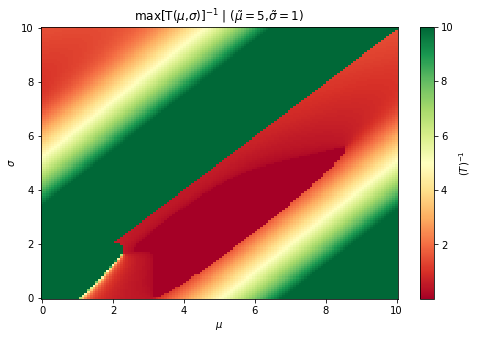

In [488]:
fig,ax=plt.subplots(figsize=(8,5))
c=ax.pcolor(UC,SC,T,cmap="RdYlGn",shading='auto')
plt.colorbar(c,label="$(T)^{-1}$",ax=ax)
ax.set_xlabel("$\mu$")
ax.set_ylabel("$\sigma$")
ax.set_title("max[T($\mu$,$\sigma$)]$^{-1}$ | ($\\tilde{\mu}=5$,$\\tilde{\sigma}=1$)")
plt.show()

In [ ]:
def pxy(t,x,y,s,m,r):
    sq=np.sqrt(np.pi*s**2 * (1-np.exp(-2*r*t))/r)
    exp=-1*(y-m-(x-m)*np.exp(-1*r*t))**2 / (s**2 * (1-np.exp(-2*r*t))/r)
    return 1/sq * np.exp(exp)
y=np.linspace(-10,10,100)
x=np.linspace(-10,10,100)
p=[]
for i in x:
    p.append(pxy(t=1,x=i,y=y,s=3,m=1,r=1))
plt.pcolor(x,y,p,cmap="RdYlBu",shading='auto')
plt.colorbar()

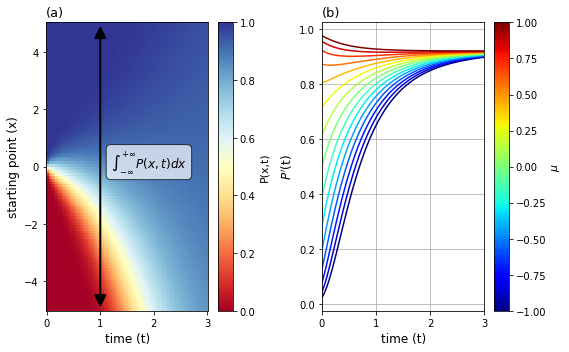

In [12]:
from sympy import *
import numpy as np
r,mu,s,x,y, t = symbols('r \\mu s x y t',real=True,positive=True)
a,b,c,d,t1 = symbols('a b c d t1',real=True,positive=True)
s1=s**2 *(1-exp(-2*r*t))/r
dd=integrate(1/sqrt(pi*d) * exp( -(a+t1)**2 / d),(t1,0,oo))
final=dd.subs(d,s1).subs(a,-mu-(x-mu)*exp(-r*t))
final.subs(t,oo).subs([(r,1),(s,1),(mu,4)]).evalf()


m1=1;r1=1;s1=1

pxy=lambdify([x,mu,r,s,t],final)
t1=np.linspace(1e-3,3,100)
x1=np.linspace(-5,5,100)
tt,xx=np.meshgrid(t1,x1)
p_tmp=pxy(xx,m1,r1,s1,tt).reshape(100,100)


fig,ax1=plt.subplots(1,2,figsize=(8,5))
fs=12
ax=ax1[0]
ax.set_title("(a)", size=13, loc='left')
cnt=ax.pcolor(t1,x1,p_tmp,shading='auto',cmap="RdYlBu")
ax.set_ylabel("starting point (x)",fontsize=fs)
ax.set_xlabel("time (t)",fontsize=fs)

axcb=plt.colorbar(cnt,ax=ax)
axcb.set_label(label="P(x,t)",fontsize=fs-1)
ax.annotate( '', xy=(1,-5),
              xytext=(1, 5),
            xycoords="data",
              arrowprops=dict( arrowstyle="<|-|>",mutation_scale=25,color="k",lw=2,ls="-" )
            )
ax.annotate( '$\\int_{-\\infty}^{+\\infty} P(x,t)dx$', xy=(1,-5),
              xytext=(1.2, 0),
            xycoords="data",
            bbox=dict(facecolor='w',alpha=0.7, edgecolor='black', boxstyle='round,pad=.4'),fontsize=fs)

from scipy.stats import norm
def gauss(x,mu,sig):return norm(loc = mu, scale = sig).pdf(x)

main=[]
n=15
mu_range=np.linspace(-1,1,n)
for start in mu_range:
    x=np.linspace(-100,100,1050)
    T=np.linspace(1e-3,3,500)
    s=[]
    for t in T:
        s.append(np.trapz(np.multiply(gauss(x,start,.5),pxy(x,m1,r1,s1,t)),x=x))
    main.append(s)
ax=ax1[1]
ax.set_title("(b)", size=13, loc='left')
lc = multiline([T]*n, np.array(main), mu_range, cmap='jet', lw=1.5,ax=ax)
axcb = fig.colorbar(lc,ax=ax)
axcb.set_label(label="$\mu$",fontsize=fs-1)
ax.set_ylabel("$P^\\prime$(t)",fontsize=fs)
ax.set_xlabel("time (t)",fontsize=fs)
ax.set_xlim(0,3)
ax.grid()
plt.tight_layout()
plt.savefig("paper/figs/Pt.png",dpi=300)

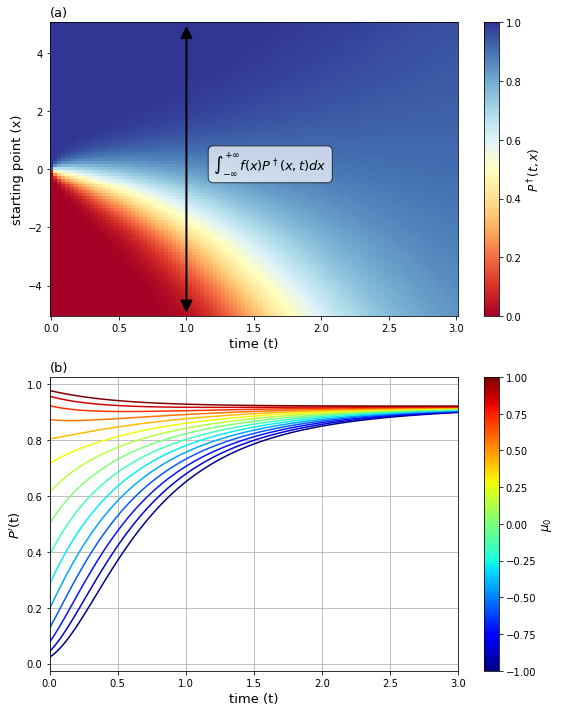

In [36]:
from sympy import *
import numpy as np
r,mu,s,x,y, t = symbols('r \\mu s x y t',real=True,positive=True)
a,b,c,d,t1 = symbols('a b c d t1',real=True,positive=True)
s1=s**2 *(1-exp(-2*r*t))/r
dd=integrate(1/sqrt(pi*d) * exp( -(a+t1)**2 / d),(t1,0,oo))
final=dd.subs(d,s1).subs(a,-mu-(x-mu)*exp(-r*t))
final.subs(t,oo).subs([(r,1),(s,1),(mu,4)]).evalf()


m1=1;r1=1;s1=1

pxy=lambdify([x,mu,r,s,t],final)
t1=np.linspace(1e-3,3,100)
x1=np.linspace(-5,5,100)
tt,xx=np.meshgrid(t1,x1)
p_tmp=pxy(xx,m1,r1,s1,tt).reshape(100,100)


fig,ax1=plt.subplots(2,1,figsize=(8,10))
fs=13
ax=ax1[0]
ax.set_title("(a)", size=13, loc='left')
cnt=ax.pcolor(t1,x1,p_tmp,shading='auto',cmap="RdYlBu")
ax.set_ylabel("starting point (x)",fontsize=fs)
ax.set_xlabel("time (t)",fontsize=fs)

axcb=plt.colorbar(cnt,ax=ax)
axcb.set_label(label="$P^\\dagger(t,x)$",fontsize=fs-1)
ax.annotate( '', xy=(1,-5),
              xytext=(1, 5),
            xycoords="data",
              arrowprops=dict( arrowstyle="<|-|>",mutation_scale=25,color="k",lw=2,ls="-" )
            )
ax.annotate( '$\\int_{-\\infty}^{+\\infty}f(x)  P^\\dagger(x,t)dx$', xy=(1,-5),
              xytext=(1.2, 0),
            xycoords="data",
            bbox=dict(facecolor='w',alpha=0.7, edgecolor='black', boxstyle='round,pad=.4'),fontsize=fs)

from scipy.stats import norm
def gauss(x,mu,sig):return norm(loc = mu, scale = sig).pdf(x)

main=[]
n=15
mu_range=np.linspace(-1,1,n)
for start in mu_range:
    x=np.linspace(-100,100,1050)
    T=np.linspace(1e-3,3,500)
    s=[]
    for t in T:
        s.append(np.trapz(np.multiply(gauss(x,start,.5),pxy(x,m1,r1,s1,t)),x=x))
    main.append(s)
ax=ax1[1]
ax.set_title("(b)", size=13, loc='left')
lc = multiline([T]*n, np.array(main), mu_range, cmap='jet', lw=1.5,ax=ax)
axcb = fig.colorbar(lc,ax=ax)
axcb.set_label(label="$\mu_0$",fontsize=fs-1)
ax.set_ylabel("$P^\\prime$(t)",fontsize=fs)
ax.set_xlabel("time (t)",fontsize=fs)
ax.set_xlim(0,3)
ax.grid()
plt.tight_layout()
plt.savefig("paper/figs/Pt.png",dpi=300)

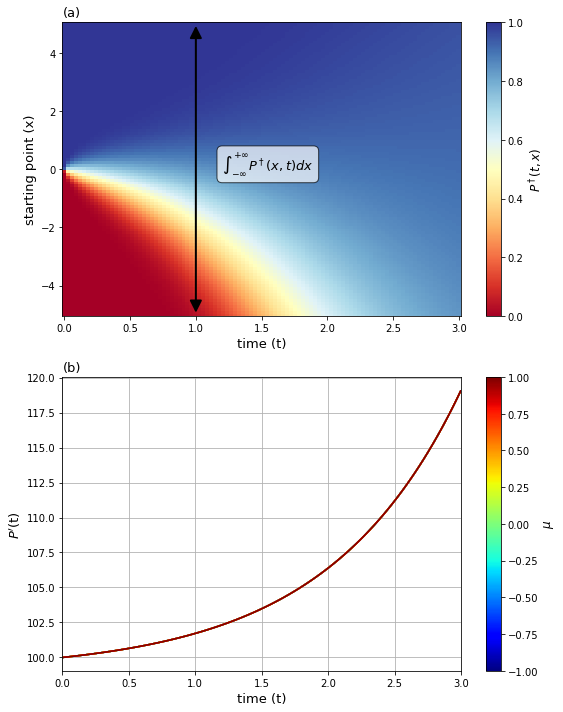

In [34]:
from sympy import *
import numpy as np
r,mu,s,x,y, t = symbols('r \\mu s x y t',real=True,positive=True)
a,b,c,d,t1 = symbols('a b c d t1',real=True,positive=True)
s1=s**2 *(1-exp(-2*r*t))/r
dd=integrate(1/sqrt(pi*d) * exp( -(a+t1)**2 / d),(t1,0,oo))
final=dd.subs(d,s1).subs(a,-mu-(x-mu)*exp(-r*t))
final.subs(t,oo).subs([(r,1),(s,1),(mu,4)]).evalf()


m1=1;r1=1;s1=1

pxy=lambdify([x,mu,r,s,t],final)
t1=np.linspace(1e-3,3,100)
x1=np.linspace(-5,5,100)
tt,xx=np.meshgrid(t1,x1)
p_tmp=pxy(xx,m1,r1,s1,tt).reshape(100,100)


fig,ax1=plt.subplots(2,1,figsize=(8,10))
fs=13
ax=ax1[0]
ax.set_title("(a)", size=13, loc='left')
cnt=ax.pcolor(t1,x1,p_tmp,shading='auto',cmap="RdYlBu")
ax.set_ylabel("starting point (x)",fontsize=fs)
ax.set_xlabel("time (t)",fontsize=fs)

axcb=plt.colorbar(cnt,ax=ax)
axcb.set_label(label="$P^\\dagger(t,x)$",fontsize=fs-1)
ax.annotate( '', xy=(1,-5),
              xytext=(1, 5),
            xycoords="data",
              arrowprops=dict( arrowstyle="<|-|>",mutation_scale=25,color="k",lw=2,ls="-" )
            )
ax.annotate( '$\\int_{-\\infty}^{+\\infty} P^\\dagger(x,t)dx$', xy=(1,-5),
              xytext=(1.2, 0),
            xycoords="data",
            bbox=dict(facecolor='w',alpha=0.7, edgecolor='black', boxstyle='round,pad=.4'),fontsize=fs)

from scipy.stats import norm
def gauss(x,mu,sig):return norm(loc = mu, scale = sig).pdf(x)

main=[]
n=15
mu_range=np.linspace(-1,1,n)
for start in mu_range:
    x=np.linspace(-100,100,1050)
    T=np.linspace(1e-3,3,500)
    s=[]
    for t in T:
#         s.append(np.trapz(np.multiply(gauss(x,start,.09),pxy(x,m1,r1,s1,t)),x=x))
        s.append(np.trapz(pxy(x,m1,r1,s1,t),x=x))
    main.append(s)
ax=ax1[1]
ax.set_title("(b)", size=13, loc='left')
lc = multiline([T]*n, np.array(main), mu_range, cmap='jet', lw=1.5,ax=ax)
axcb = fig.colorbar(lc,ax=ax)
axcb.set_label(label="$\mu$",fontsize=fs-1)
ax.set_ylabel("$P^\\prime$(t)",fontsize=fs)
ax.set_xlabel("time (t)",fontsize=fs)
ax.set_xlim(0,3)
ax.grid()
plt.tight_layout()
# plt.savefig("paper/figs/Pt.png",dpi=300)